## Exploratory Data Analysis
### dataset is from https://www.kaggle.com/datasets/shivamb/netflix-shows
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### The Data

In [41]:
# Load Dataset
df = pd.read_csv('netflix_titles.csv', lineterminator='\n')

In [43]:
# Display 5 data
display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [45]:
# Display Basic Info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


None

In [47]:
#Description of the data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [58]:
df.shape

(8807, 12)

In [49]:
#checking duplicate values 
df.duplicated().sum()

0

=> dataset has no duplicate rows

In [54]:
# Checking for Missing Values
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

<Axes: >

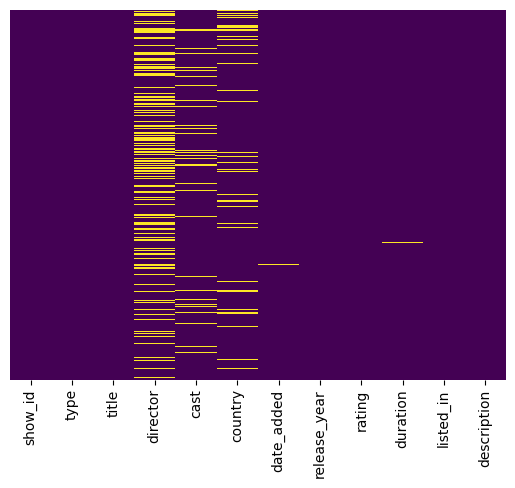

In [56]:
#We can use seaborn to create a simple heatmap to see where we are missing data!
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [60]:
# Fill Missing Values (Basic Handling)
df.fillna("Unknown", inplace=True)

In [65]:
# Check after cleaning
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

=> Exploration summary
   - dataframe consists of 9827 rows and 9 columns
   - dataframe has no duplicates values   


In [87]:
df["release_year"] = pd.to_datetime(df["release_year"], format='%Y')


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   object        
 7   release_year  8807 non-null   datetime64[ns]
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), object(11)
memory usage: 825.8+ KB


### Data Visualization

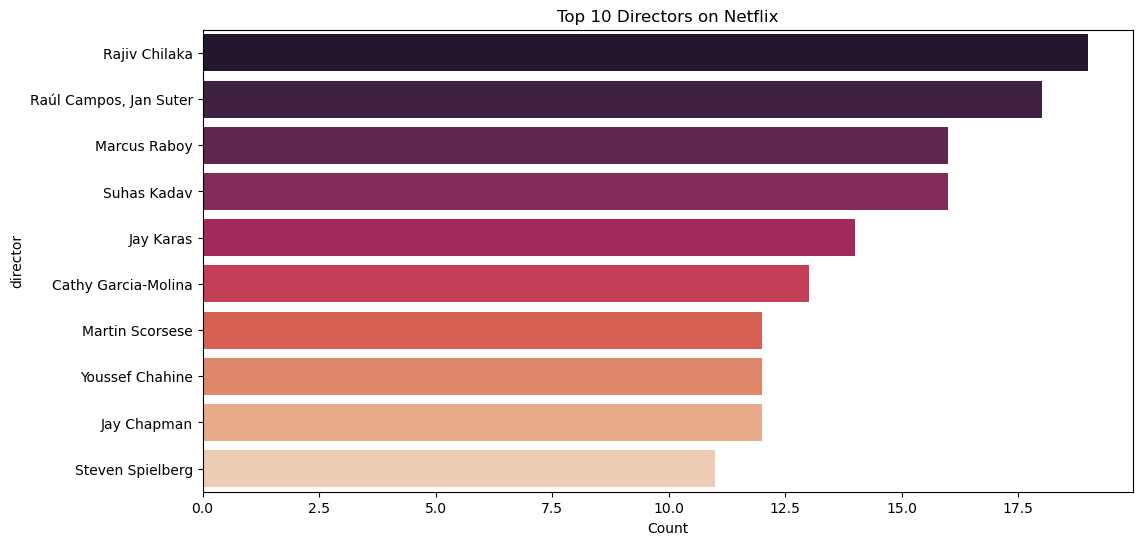

In [105]:
# Top 10 Directors
top_directors = df[df['director'] != "Unknown"]['director'].value_counts()[:10]

# Create the plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='rocket', hue=top_directors.index, legend=False)
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Count")
plt.savefig("top_directors.png", dpi=200, bbox_inches="tight")  # Save as PNG
plt.show()

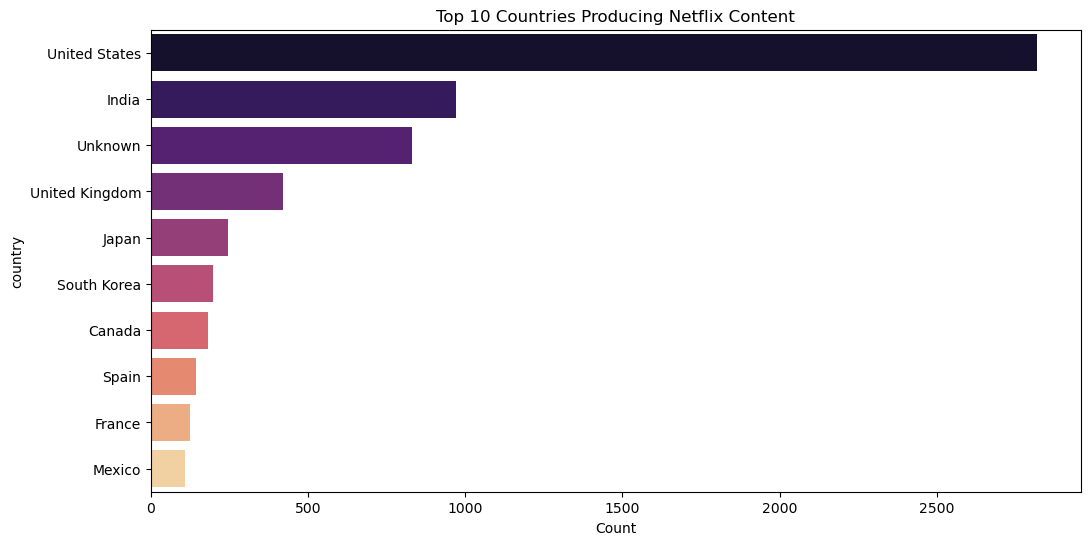

In [99]:
# Country-wise Distribution
# Top 10 countries producing Netflix content
top_countries = df['country'].value_counts()[:10]

# Create the plot with the correct use of hue
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma', hue=top_countries.index)
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Count")
plt.show()

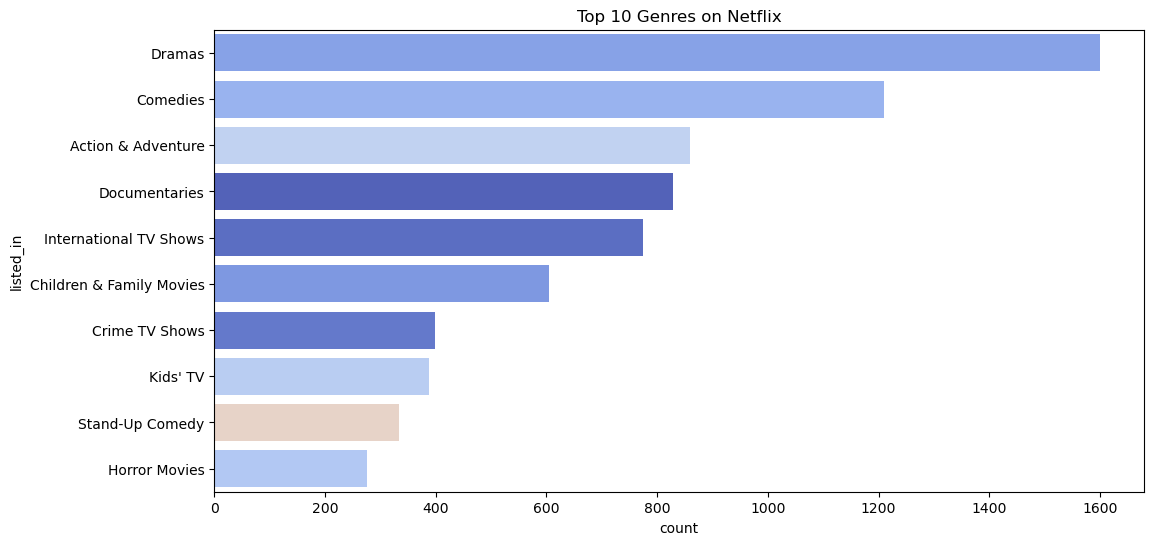

In [95]:
# Top 10 Genres
# Apply the transformation to get the first genre
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

# Create the plot
plt.figure(figsize=(12,6))
sns.countplot(y=df['listed_in'], order=df['listed_in'].value_counts().index[:10], palette='coolwarm', hue=df['listed_in'])
plt.title("Top 10 Genres on Netflix")
plt.show()

In [69]:
print("Basic EDA on Netflix dataset is complete!")

Basic EDA on Netflix dataset is complete!
